In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
iris =load_iris()

In [3]:
df =pd.DataFrame(data =iris.data,columns=iris.feature_names)

In [4]:
df['species']=iris.target

In [5]:
df.head(1)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0


In [6]:
df=df[df['species']!=0][['sepal length (cm)','petal length (cm)','species']]

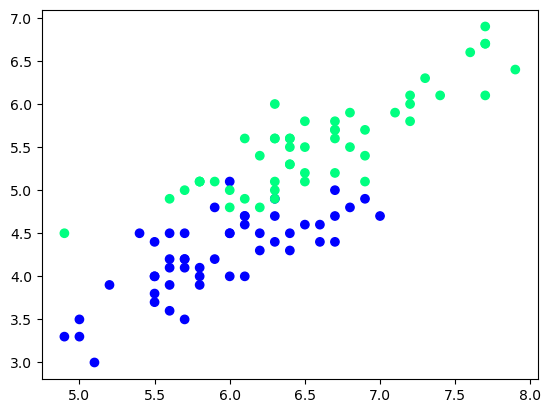

In [7]:
plt.scatter(df['sepal length (cm)'],df['petal length (cm)'],c =df['species'],cmap ='winter')

In [8]:
df = df.sample(100)
df_train =df.iloc[:60,:].sample(10)
df_val =df.iloc[60:80,:].sample(5)
df_test = df.iloc[80:,:].sample(5)

In [9]:
df_train

,sepal length (cm),petal length (cm),species
85,6.0,4.5,1
120,6.9,5.7,2
117,7.7,6.7,2
126,6.2,4.8,2
79,5.7,3.5,1
69,5.6,3.9,1
95,5.7,4.2,1
144,6.7,5.7,2
74,6.4,4.3,1
81,5.5,3.7,1


In [10]:
X_test = df_val.iloc[:,0:2].values
y_test = df_val.iloc[:,-1].values

CASE 1 : BAGGING
    base model : DT

In [11]:
df_bag =df_train.sample(8,replace= True)
X = df_bag.iloc[:,0:2]
y = df_bag.iloc[:,-1]

In [12]:
#pip install mlxtend

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree
from mlxtend.plotting import plot_decision_regions
from sklearn.metrics import accuracy_score

In [14]:
dt_bag1 = DecisionTreeClassifier()

In [15]:
def evaluate(clf,X,y):
    clf.fit(X,y)
    plot_tree(clf)
    plt.show()
    plot_decision_regions(X.values, y.values, clf =clf, legend =2)
    y_pred = clf.predict(X_test)
    print(accuracy_score(y_test,y_pred))

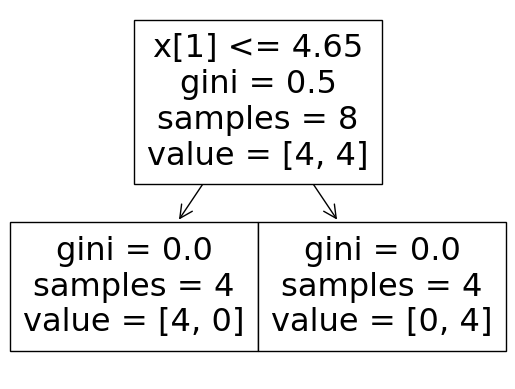

0.8


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


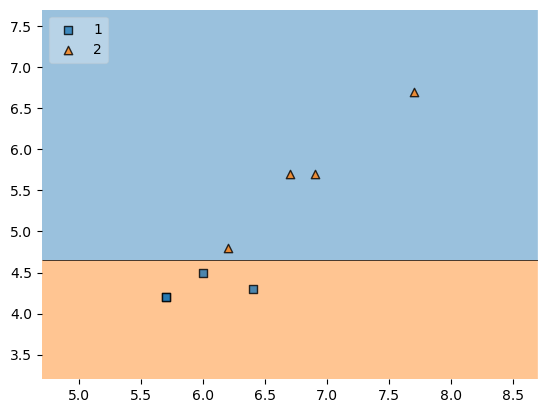

In [16]:
evaluate(dt_bag1,X,y)

In [20]:
df_bag2 =df_train.sample(8,replace= True)
X = df_bag2.iloc[:,0:2]
y = df_bag2.iloc[:,-1]

In [21]:
dt_bag2 =DecisionTreeClassifier()

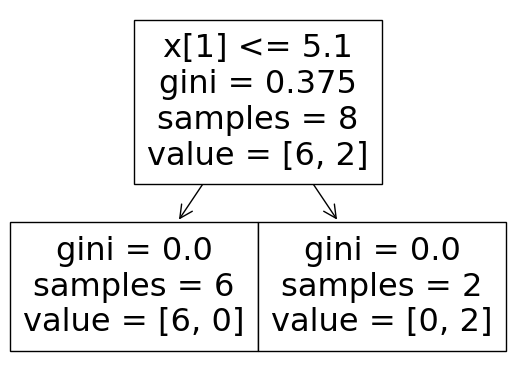

1.0


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


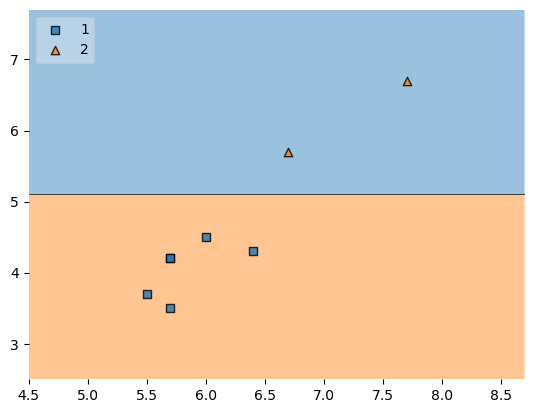

In [22]:
evaluate(dt_bag2,X,y)

In [27]:
df_bag3 =df_train.sample(8,replace= True)
X = df_bag3.iloc[:,0:2]
y = df_bag3.iloc[:,-1]

In [28]:
dt_bag3= DecisionTreeClassifier()

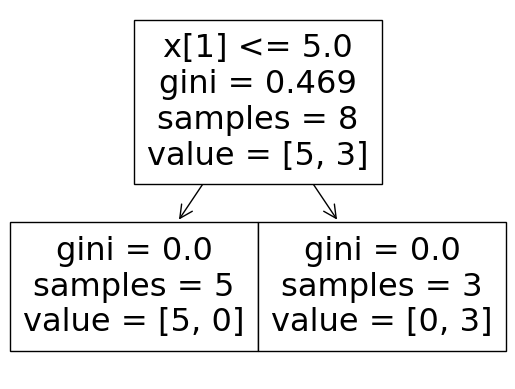

1.0


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


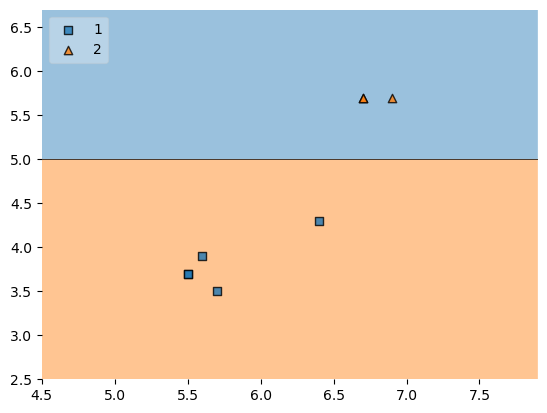

In [29]:
evaluate(dt_bag3,X,y)

In [33]:
df_test

,sepal length (cm),petal length (cm),species
75,6.6,4.4,1
146,6.3,5.0,2
113,5.7,5.0,2
142,5.8,5.1,2
119,6.0,5.0,2


In [36]:
print("pred1",dt_bag1.predict(np.array([6.6,4.4]).reshape(1,2)))
print("pred2",dt_bag2.predict(np.array([6.6,4.4]).reshape(1,2)))
print("pred3",dt_bag3.predict(np.array([6.6,4.4]).reshape(1,2)))

pred1 [1]
pred2 [1]
pred3 [1]


C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\Asus\AppData\Roaming\Python\Python39\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


PASTING: ROW SAMPLING WITHOUT REPLACEMENT
    


RANDOM SUBSPACES : COLUMNS SAMPLING ( WITH AND WITHOUT REPLACEMENT)

In [37]:
df1 = df .sample(10)


In [38]:
df1.sample(2,replace =True,axis =1)

,species,sepal length (cm)
51,1,6.4
85,1,6.0
122,2,7.7
99,1,5.7
89,1,5.5
92,1,5.8
120,2,6.9
55,1,5.7
114,2,5.8
52,1,6.9


RANDOM PATCHES : COMBINATION OF ROW AND COLUMN SAMPLING

In [39]:
df1.sample(8,replace= True).sample(2,replace = True,axis =1)

,petal length (cm),petal length (cm)
52,4.9,4.9
51,4.5,4.5
114,5.1,5.1
55,4.5,4.5
55,4.5,4.5
122,6.7,6.7
85,4.5,4.5
89,4.0,4.0
